In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [25]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [41]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [27]:
A @ e_1

array([1, 4, 7])

In [28]:
A @ e_2

array([2, 5, 8])

In [29]:
A @ e_3

array([3, 6, 9])

On each example, one of the columns is selected from the A matrix. This is because matrices represent the linear combinations of the columns, and e_1 represents weightinig the first column 1, and the rest 0. This example continues as we see different weighting of the columns from A, extracting one column each time.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [30]:
u = np.ones(3)
A @ u

array([ 6., 15., 24.])

Now we see each column of A being given a multiplier of 1, so the first element of the result is a linear combination of the first elements in each column of A. 6 = 1 + 2 + 3

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [31]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])
A@x

array([-2,  4, 11])

The result of an identity matrix is just the original vector, beacuse it takes the first column from each and puts it in the first row position. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [32]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])
A@x

array([11, -2,  4])

Changing the order of the 1s in the matrix results in a jumbled version of the original vector, with the position of the elements changed.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [33]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [57]:
E1 = A@e_1
print(E1)
E2 = A@e_2
print(E2)
E3 = A@e_3
print(E3)

[0.50052958 0.02574731 0.47372311]
[0.29163968 0.2804039  0.42795643]
[0.29050361 0.28220175 0.42729464]


Each result gives us one of the columns from the transition matrix, and shows us the chances if having the three possible conditions, based on the condition today. If today's event is E1, 50.05% of the time the next event will be E1 again.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [ ]:
for _ in range(4):
    E1 = A @ E1
    E2 = A @ E@
    E3 = A @ E3
print(f'E1: {E1}')
print(f'E2: {E2}')
print(f'E3: {E3}')

E1: [0.29206573 0.27963902 0.42829526]
E2: [0.29206573 0.27963902 0.42829526]
E3: [0.29206573 0.27963902 0.42829526]


They all converge to the same vector, which represent the long run proportions for this chain.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [5]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [9]:
init = np.array([1,0])
d1 = T @ init
d1

array([0.25, 0.75])

This matrix shows us that starting with a rainy day, tomorrow has a 25% chance of being rainy and a 75% chance of being sunny.

In [45]:
d2 = T @ d1
d2

array([0.4375, 0.5625])

This shows the forecast two days ahead, assuming we started with a rainy day.

In [50]:
dx = d2
for _ in range(15):
    dx = T @ dx
    print(dx)

[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]


This settles to a long run probability of 0.40 for rain and 0.6 for not rainy.

In [51]:
x1 = np.array([0,1])
for _ in range(15):
    x1 = T @ x1
    print(x1)

[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]
[0.39999998 0.60000002]
[0.40000001 0.59999999]
[0.4 0.6]
[0.4 0.6]


Even starting on a non-rainy day, after a certain number of days, we fall into a long run proportion.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [73]:
df = pd.read_csv('cville_weather.csv')
df.isnull().sum() # Large amount of missing variables for the attributes
df['rain'] = df['PRCP'] > 0

states = sorted(list(df['rain'].unique()))
tr_counts = np.zeros((len(states), len(states)))
seq = df['rain'].values

for t in range(1, len(seq)):
    x_tm1 = seq[t-1]
    x_t = seq[t]
    index_from = states.index(x_tm1)
    index_to = states.index(x_t)
    tr_counts[index_to, index_from] += 1

sums = tr_counts.sum(axis=0, keepdims=True)
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)
tr_pr


array([[0.73160173, 0.35195531],
       [0.26839827, 0.64804469]])

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [13]:
import pickle
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

len(data)

1000

In [16]:
states = set(data[0])
for i in range(1, len(data)):
    new_trip = data[i]
    new_states = set(new_trip)
    states = states.union(new_states)
states = list(states)

In [17]:
tr_counts = np.zeros((len(states), len(states)))
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        x_tm1 = seq[t-1]
        x_t = seq[t]
        index_from =states.index(x_tm1)
        index_to = states.index(x_t)
        tr_counts[index_to,index_from] += 1

In [22]:
sums = tr_counts.sum(axis=0, keepdims=True)
print(f'state propotions: {sums}')
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)

state propotions: [[6.544000e+05 1.224335e+06 1.038800e+04 4.086350e+05 5.017520e+05
  4.415730e+05 8.393600e+05 7.252200e+04 4.930000e+02 1.063810e+05
  1.978286e+06 5.077810e+05 3.168450e+05 3.705730e+05 3.952900e+05
  3.851989e+06 2.797710e+06 1.112820e+05 3.000000e+00 8.740570e+05
  1.743200e+05 8.010000e+03 2.363902e+06 3.859100e+04 1.431100e+04
  8.886410e+05 1.627100e+05 5.102590e+05 2.292350e+05 3.701250e+05
  5.791000e+04 1.200000e+01 5.505930e+05 1.000000e+00 1.058700e+05
  2.171460e+05 1.803502e+06 3.603000e+03]]


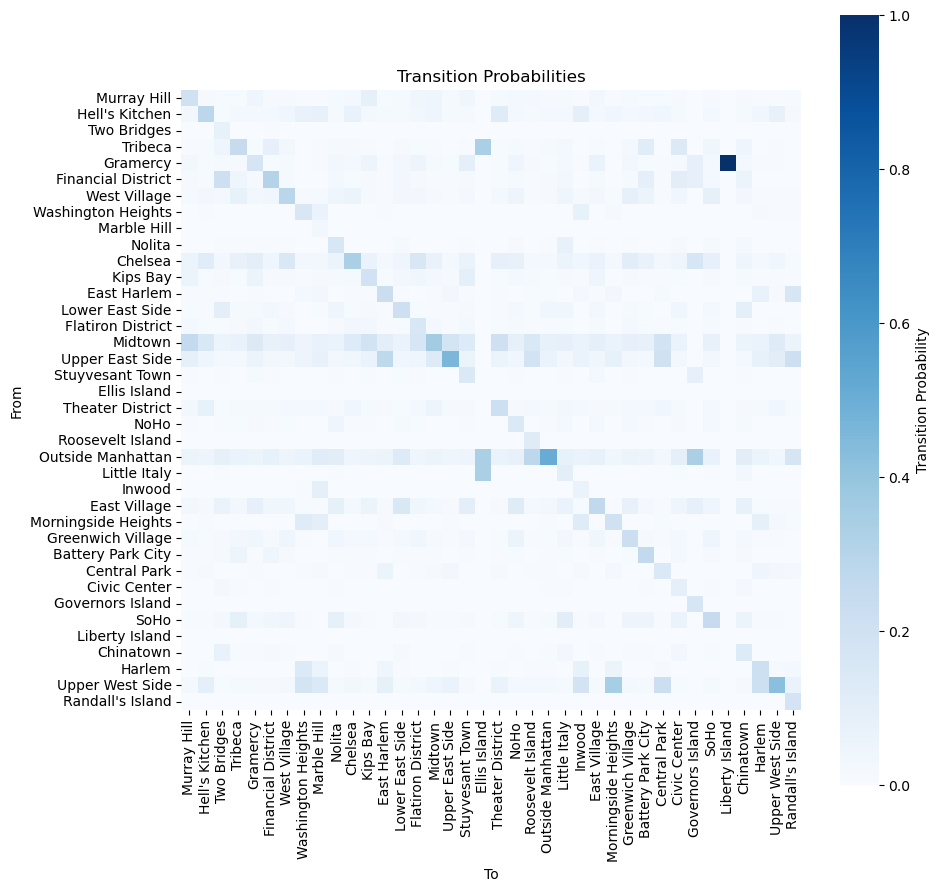

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(tr_pr, cmap='Blues', square=True, xticklabels=states, yticklabels=states, cbar_kws={'label':'Transition Probability'})
plt.title('Transition Probabilities')
plt.xlabel('To')
plt.ylabel('From')
plt.show()